In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#### Data preprocessing

In [ ]:
data,labels = fetch_openml(name='mnist_784',return_X_y=True)

In [ ]:
np.random.seed(42)
x_train,x_test,y_train,y_test = data[:49000].to_numpy(),data[49000:].to_numpy(),labels[:49000].to_numpy(),labels[49000:].to_numpy()
#x_trainarr,x_testarr,y_trainarr,y_testarr = np.asarray(x_train),np.asarray(x_test),np.asarray(y_train),np.asarray(y_test)

In [ ]:
x_trainarr,x_testarr,y_trainarr,y_testarr = train_test_split(data,labels,test_size = 0.3, shuffle =True, random_state = 42)

In [ ]:
x_train.mean(axis = 1)

array([35.10841837, 39.6619898 , 24.7997449 , ..., 46.9502551 ,
       23.89668367, 28.77678571])

In [ ]:
i_6 = np.where(y_train=='6')[0]
i_9 = np.where(y_train=='9')[0]
x_6 = x_train[i_6]
x_9 = x_train[i_9]
y_6 = y_train[i_6]
y_9 = y_train[i_9]
x_train_69_t = np.row_stack((x_6,x_9))
y_train_69_l = np.concatenate((y_6,y_9))
y_train_69_n = np.where(y_train_69_l=='6',1,0)
i_6[0].shape

()

In [ ]:
i_6

array([   13,    18,    32, ..., 48958, 48994, 48999])

In [ ]:
i_6_test = np.where(y_test=='6')[0]
i_9_test = np.where(y_test=='9')[0]
x_6_test = x_test[i_6_test]
x_9_test = x_test[i_9_test]
y_6_test = y_test[i_6_test]
y_9_test = y_test[i_9_test]
x_test_69_t = np.row_stack((x_6_test,x_9_test))
y_test_69_l = np.concatenate((y_6_test,y_9_test))
y_test_69_n = np.where(y_test_69_l=='6',1,0)
np.bincount(y_train_69_n)

array([4891, 4855])

In [ ]:
from sklearn.utils import shuffle
x_train_69,y_train_69 = shuffle(x_train_69_t,y_train_69_n,random_state=1729)
x_test_69,y_test_69 = shuffle(x_test_69_t,y_test_69_n,random_state=1729)
np.sum(y_train_69,axis=0)
#np.sum(y_test_69,axis=0)

4855

In [ ]:
SS = StandardScaler()
x_train_69Tf = SS.fit_transform(x_train_69)
np.mean(x_train_69Tf,axis=1)[0],np.mean(x_train_69Tf,axis=0)[0],np.std(x_train_69Tf,axis=1)[0],np.std(x_train_69Tf,axis=0)[0]

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)

#### Partial fit

In [ ]:
SGD = SGDClassifier(loss='log',warm_start=True,random_state=10)
SGD1 = SGDClassifier(loss='log',warm_start=True,eta0=0.01,random_state=10,learning_rate = 'constant')
SGD2 = SGDClassifier(loss='log',warm_start = True,eta0=0.000001,random_state=10,learning_rate = 'constant')
SGD3 = SGDClassifier(loss='log',warm_start= True,eta0=0.01,random_state=10, learning_rate = 'constant')
SGD4 = SGDClassifier(loss='log',warm_start = True,eta0=0.01,learning_rate='invscaling',power_t=1,random_state=10)

In [ ]:
loss,loss1,loss2,loss3,loss4 = [],[],[],[],[]
for i in range(10):
  SGD.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD1.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD2.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD3.partial_fit(x_train_69Tf,y_train_69,classes=[0,1])
  SGD4.partial_fit(x_train_69,y_train_69,classes=[0,1])
  p1 = SGD.predict_proba(x_train_69)
  p2 = SGD1.predict_proba(x_train_69)
  p3 = SGD2.predict_proba(x_train_69)
  p4 = SGD3.predict_proba(x_train_69Tf)
  p5 = SGD4.predict_proba(x_train_69)
  l1 = log_loss(y_train_69,p1)
  l2 = log_loss(y_train_69,p2)
  l3 = log_loss(y_train_69,p3)
  l4 = log_loss(y_train_69,p4)
  l5 = log_loss(y_train_69,p5)
  loss.append(l1)
  loss1.append(l2)
  loss2.append(l3)
  loss3.append(l4)
  loss4.append(l5)

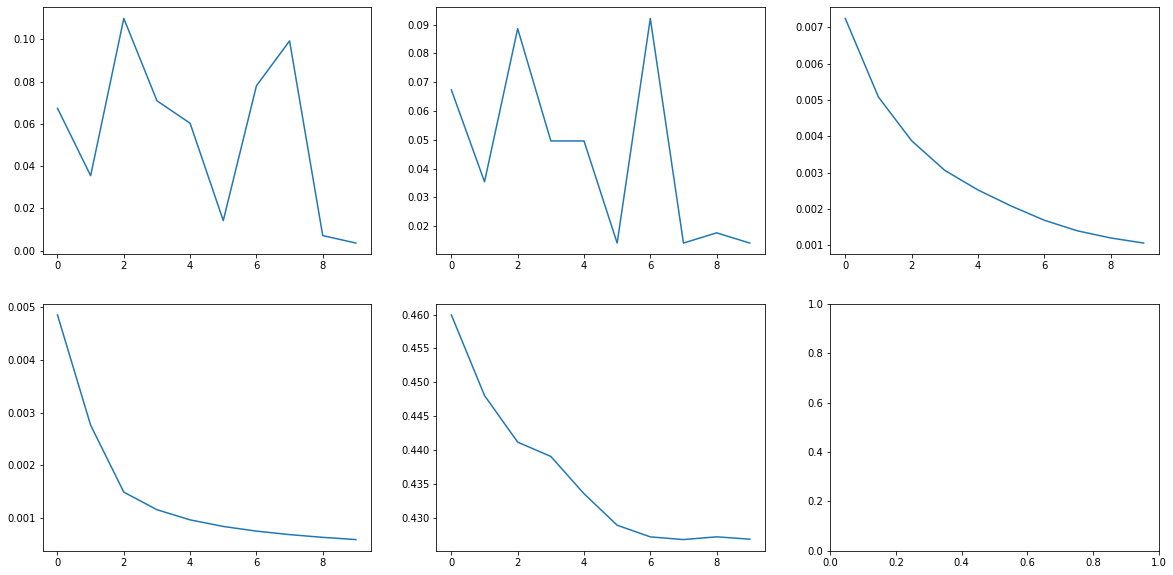

In [ ]:
def learning_curve(List1,List2,List3,List4,List5):
  iter = np.arange(10)
  f,(ax1,ax2) = plt.subplots(2,3,figsize=(20,10))
  ax1[0].plot(iter,List1)
  ax1[1].plot(iter,List2)
  ax1[2].plot(iter,List3)
  ax2[0].plot(iter,List4)
  ax2[1].plot(iter,List5)
  plt.show()
learning_curve(loss,loss1,loss2,loss3,loss4)

#### Predict proba

In [ ]:
SGD_n = SGDClassifier(loss='log',warm_start=True,max_iter=1,random_state=10)
SGD_n1 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='constant',random_state=10)
SGD_n2 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.000001,learning_rate='constant',random_state=10)
SGD_n3 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='constant',random_state=10)
SGD_n4 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='invscaling',power_t=1.0,random_state=10)

In [ ]:
loss_n,loss_n1,loss_n2,loss_n3,loss_n4 = [],[],[],[],[]
for i in range(10):
  SGD_n.fit(x_train_69,y_train_69)
  SGD_n1.fit(x_train_69,y_train_69)
  SGD_n2.fit(x_train_69,y_train_69)
  SGD_n3.fit(x_train_69,y_train_69)
  SGD_n4.fit(x_train_69,y_train_69)
  pn1 = SGD_n.predict_proba(x_train_69)
  pn2 = SGD_n1.predict_proba(x_train_69)
  pn3 = SGD_n2.predict_proba(x_train_69)
  pn4 = SGD_n3.predict_proba(x_train_69)
  pn5 = SGD_n4.predict_proba(x_train_69)
  ln1 = log_loss(y_train_69,pn1)
  ln2 = log_loss(y_train_69,pn2)
  ln3 = log_loss(y_train_69,pn3)
  ln4 = log_loss(y_train_69,pn4)
  ln5 = log_loss(y_train_69,pn5)
  loss_n.append(ln1)
  loss_n1.append(ln2)
  loss_n2.append(ln3)
  loss_n3.append(ln4)
  loss_n4.append(ln5)

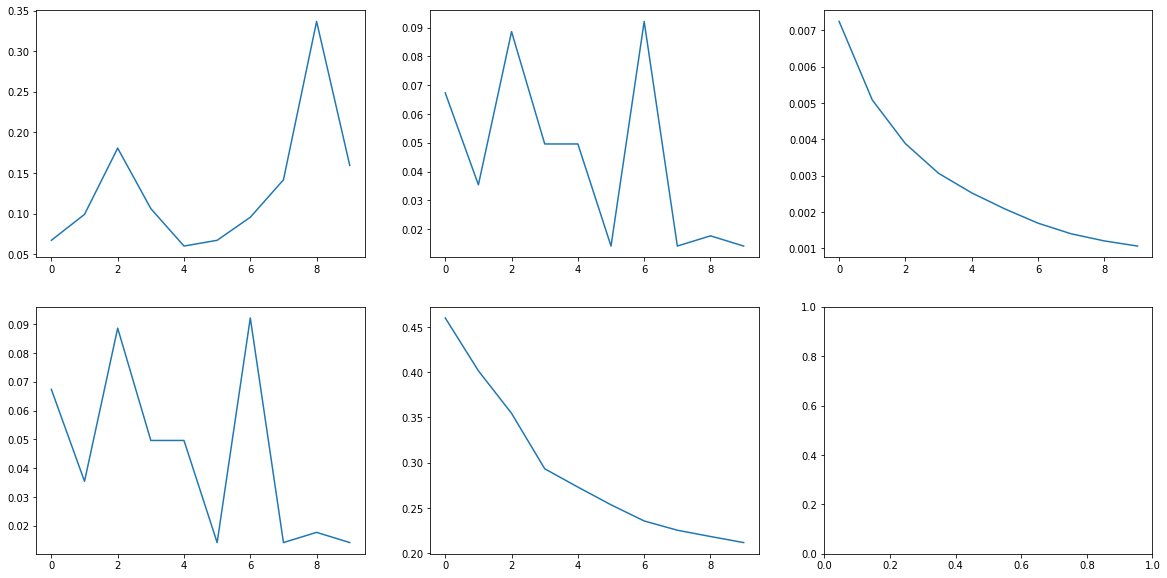

In [ ]:
learning_curve(loss_n,loss_n1,loss_n2,loss_n3,loss_n4)